# Plot music

In [8]:
import numpy as np
import os
import json

# Music
import librosa, librosa.display

# Data viz
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)

## Load audio

In [4]:
def get_style_songs(style):
    music_folder = os.path.join('..','data')
    style_path = os.path.join(music_folder, style)
    file_names = [f for f in os.listdir(style_path) if f.endswith('.wav')]
    return style_path, file_names



In [27]:
# Load audio
style_path, file_names = get_style_songs('blues')
blues101 = os.path.join(style_path,file_names[0])
blues_signal, sample_rate = librosa.load(blues101, sr=22050)
style_path, file_names = get_style_songs('jazz')
jazz101 = os.path.join(style_path,file_names[0])
jazz_signal, sample_rate = librosa.load(jazz101, sr=22050)

In [28]:
import IPython.display as ipd
ipd.Audio(jazz101) # load a local WAV file

## Waveform


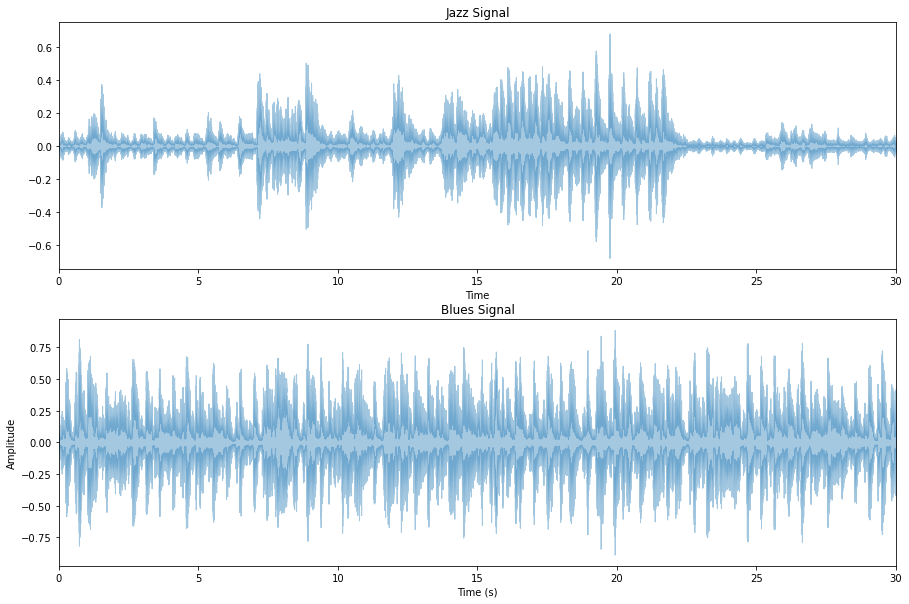

In [52]:
def plot_wave(jazz_signal, blues_signal):
    
    
    librosa.display.waveplot(jazz_signal, sample_rate, alpha=0.4,ax=axes[0])
    axes[0].set_title('Jazz Signal')
    librosa.display.waveplot(blues_signal, sample_rate, alpha=0.4, ax=axes[1])
    axes[1].set_title('Blues Signal')
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()
    
plot_wave(jazz_signal, blues_signal)

## FFT

In [54]:
def plot_fft(signal):
    fft = np.fft.fft(signal)

    # calculate abs values on complex numbers to get magnitude
    spectrum = np.abs(fft)

    # create frequency variable
    f = np.linspace(0, sample_rate, len(spectrum))

    # take half of the spectrum and frequency
    left_spectrum = spectrum[:int(len(spectrum)/2)]
    left_f = f[:int(len(spectrum)/2)]
    
    # plot spectrum
    plt.figure(figsize=FIG_SIZE)
    plt.plot(left_f, left_spectrum, alpha=0.4)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.title("Power spectrum")

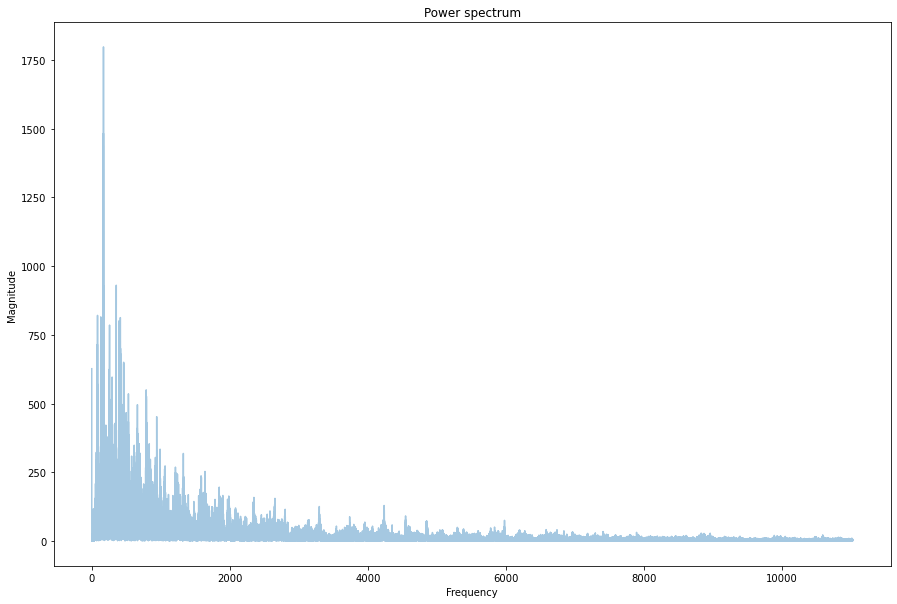

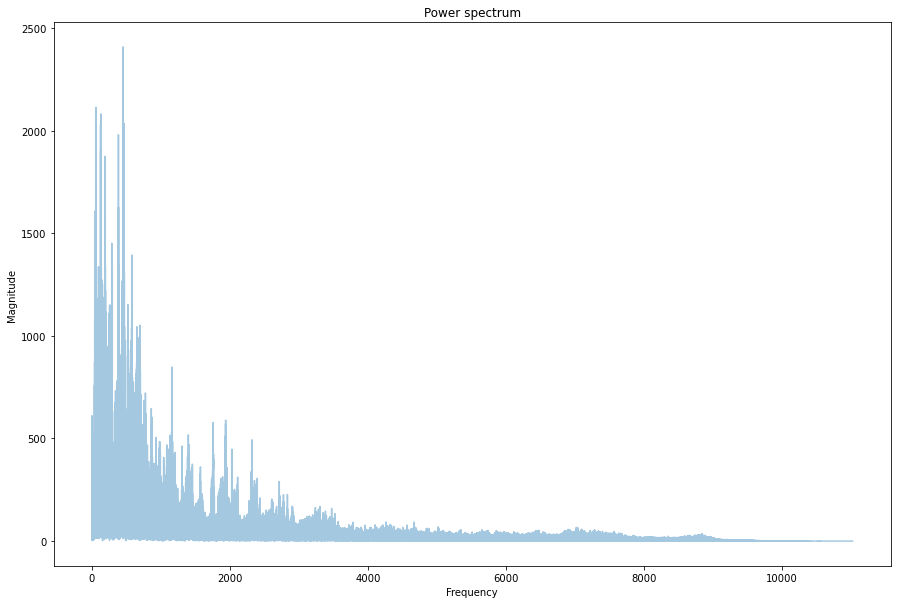

In [58]:
plot_fft(jazz_signal)
plot_fft(blues_signal)


## Spectogram

In [86]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

def spectogram(signal):
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    spectrogram = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(spectrogram)
    mfcc = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)


    return stft, spectogram, log_spectrogram, mfcc


In [87]:
stft_j, spectogram_j, log_spectogram_j, mfcc_j = spectogram(jazz_signal)
stft_b, spectogram_b, log_spectogram_b, mfcc_b = spectogram(blues_signal)

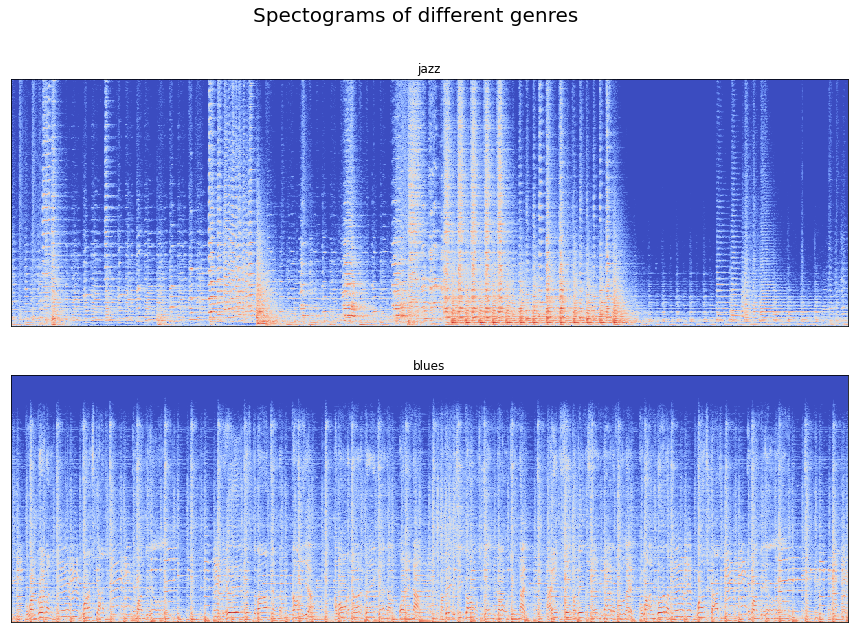

In [106]:
fig, axes = plt.subplots(2,figsize = FIG_SIZE)
fig.suptitle('Spectograms of different genres', fontsize=20)
axes[0].set_title('jazz')
axes[1].set_title('blues')
librosa.display.specshow(log_spectogram_j, sr=sample_rate, hop_length=hop_length, ax = axes[0])
librosa.display.specshow(log_spectogram_b, sr=sample_rate, hop_length=hop_length, ax = axes[1])

Text(0.5, 1.0, 'Spectrogram (dB)')

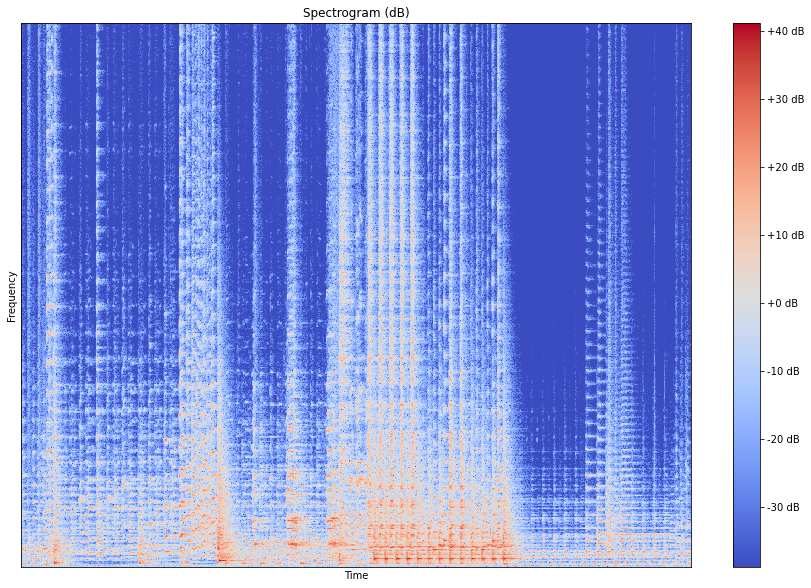

In [67]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

## MFCCs mel spectogram

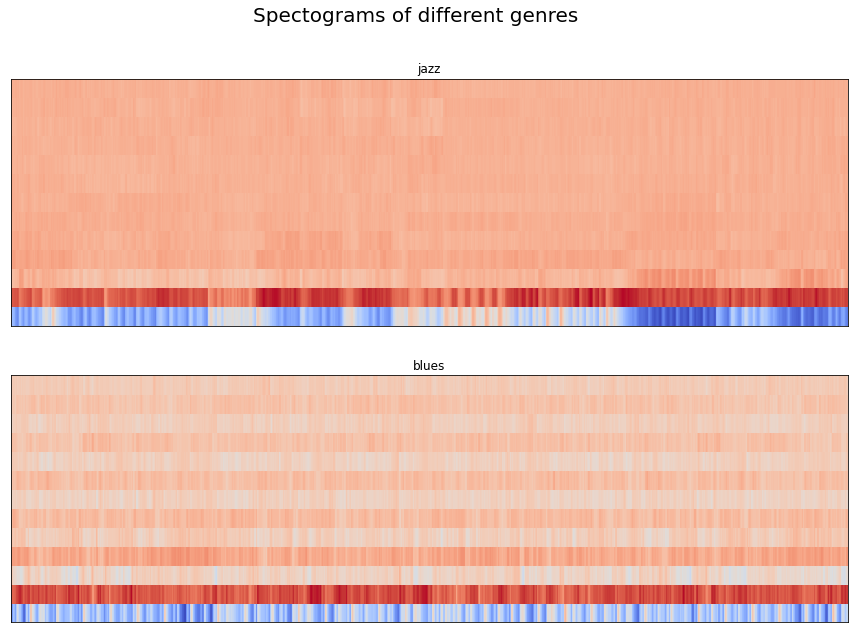

In [107]:
fig, axes = plt.subplots(2,figsize = FIG_SIZE)
fig.suptitle('Spectograms of different genres', fontsize=20)
axes[0].set_title('jazz')
axes[1].set_title('blues')
librosa.display.specshow(mfcc_j, sr=sample_rate, hop_length=hop_length, ax = axes[0])
librosa.display.specshow(mfcc_b, sr=sample_rate, hop_length=hop_length, ax = axes[1])

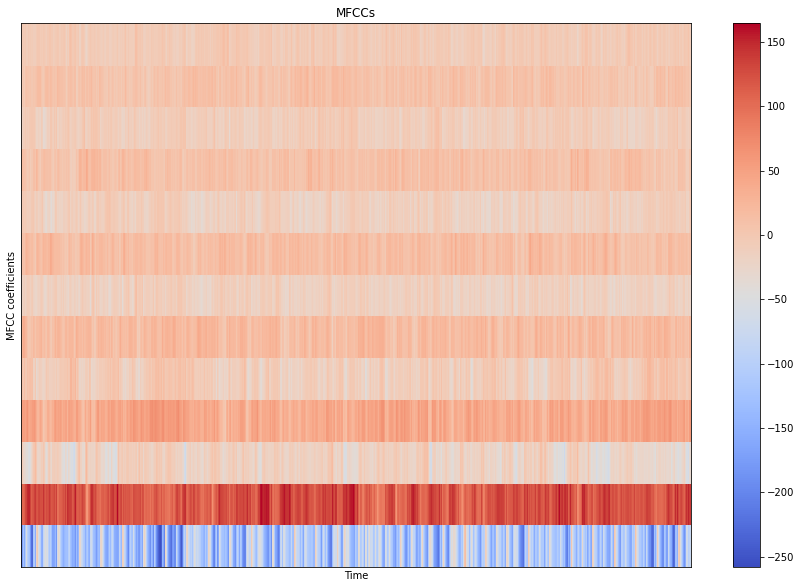

In [16]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

## Beat Track

In [18]:
from librosa.beat import beat_track
sr=22050
y = signal

tempo, beats = beat_track(y=signal, 
           sr=22050, 
           onset_envelope=None, 
           hop_length=512, 
           start_bpm=120.0, 
           tightness=100, 
           trim=True, 
           bpm=None, 
           prior=None, units='frames')
print('tempo: ',tempo)
print('beats: ',beats)

# Beat as timestamps
librosa.frames_to_time(beats, sr=22050)

tempo:  123.046875
beats:  [  11   32   53   73   94  114  135  156  177  197  218  239  260  280
  301  322  343  363  384  405  426  446  467  488  509  529  550  570
  591  612  633  653  673  693  713  734  755  775  796  816  837  858
  878  898  919  940  960  981 1002 1022 1043 1064 1085 1105 1126 1147
 1168 1188 1209 1230 1251]


array([ 0.2554195 ,  0.74303855,  1.2306576 ,  1.69505669,  2.18267574,
        2.64707483,  3.13469388,  3.62231293,  4.10993197,  4.57433107,
        5.06195011,  5.54956916,  6.03718821,  6.5015873 ,  6.98920635,
        7.4768254 ,  7.96444444,  8.42884354,  8.91646259,  9.40408163,
        9.89170068, 10.35609977, 10.84371882, 11.33133787, 11.81895692,
       12.28335601, 12.77097506, 13.23537415, 13.7229932 , 14.21061224,
       14.69823129, 15.16263039, 15.62702948, 16.09142857, 16.55582766,
       17.04344671, 17.53106576, 17.99546485, 18.4830839 , 18.94748299,
       19.43510204, 19.92272109, 20.38712018, 20.85151927, 21.33913832,
       21.82675737, 22.29115646, 22.77877551, 23.26639456, 23.73079365,
       24.2184127 , 24.70603175, 25.19365079, 25.65804989, 26.14566893,
       26.63328798, 27.12090703, 27.58530612, 28.07292517, 28.56054422,
       29.04816327])

## Enveloppe

In [19]:
# ONset Enveloppe

onset_env = librosa.onset.onset_strength(signal, sr=sr,
                                         aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,
                                       sr=sr)
tempo

123.046875

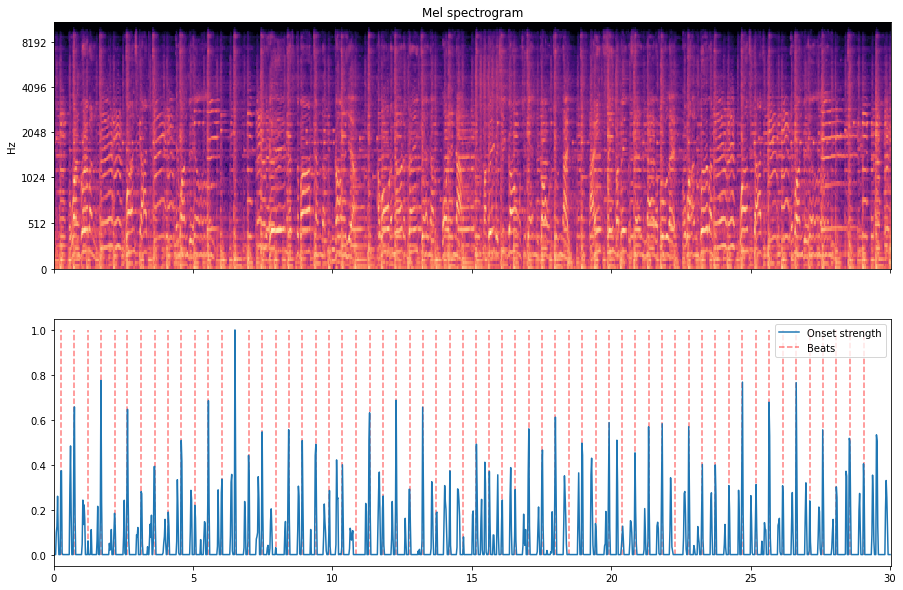

In [24]:
hop_length = 512
fig, ax = plt.subplots(nrows=2, sharex=True,figsize=FIG_SIZE)
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', hop_length=hop_length,
                         ax=ax[0])
ax[0].label_outer()
ax[0].set(title='Mel spectrogram')
ax[1].plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')
ax[1].legend()